# Introduction
    
Due to rapid growth in field of cashless or digital 
transactions, credit cards are widely used in all 
around the world. Credit cards providers are 
issuing thousands of cards to their customers.
 Providers have to ensure all the credit card users 
should be genuine and real. Any mistake in issuing 
a card can be reason of financial crises. 
Due to rapid growth in cashless transaction,
 the chances of number of fraudulent transactions can also increasing.
 A Fraud transaction can be identified by analyzing various
 behaviors of credit card customers from previous 
transaction history datasets. If any deviation
 is noticed in spending behavior from available patterns, 
it is possibly of fraudulent transaction. 
Data mining and machine learning techniques are widely used in credit card 
fraud detection. In this article we are presenting review 
of various data mining and machine learning methods
 which are widely used for credit card fraud detections and  complete this project end to end from Data Understanding to deploy Model via API .  
    
    
 

<a id=0></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">

<center>CRISP-DM Methodology</center></h3>

* [Buissness Understanding](#1)
* [Data Understanding](#2)
* [Data Preparation](#3)
* [Data Modeling](#4)   
* [Data Evaluation](#5)
    

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

    1.Determine business objectives

    2.Assess situation

    3.Determine data mining goals

    4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    
    Tasks:
    
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

   Tasks:
    
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    
    Tasks:

    1.Evaluate Result

    2.Review Process

    3.Determine next steps

<a id=1></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Buissness Understanding</center></h3>


There may be two types of questions:

**A.Technical Questions:**
  
Can ML be a solution to the problem?

    
                Do we have THE data?
                Do we have all necessary related data?
                Is there enough amount of data to develop algorithm?
                Is data collected in the right way?
                Is data saved in the right format?
                Is the access to information guaranteed?

Can we satisfy all the Business Questions by means of ML?

**B.Business Questions:**
    
What are the organization's business goals?
    
                To reduce cost and increase revenue? 
                To increase efficiencies?
                To avoid risks? To improve quality?
    
Is it worth to develop ML?
    
                In short term? In long term?
                What are the success metrics?
                Can we handle the risk if the project is unsuccessful?
    
Do we have the resources?
    
                Do we have enough time to develop ML?
                Do we have a right talented team?


    
WE are provided a synthetic dataset for a mobile payments application. In this dataset, you are provided the sender and recipient of a transaction as well as whether transactions are tagged as fraud or not fraud. Your task is to build a fraud detection API that can be called to predict whether or not a transaction is fraudulent.
You can download the dataset here:https://www.kaggle.com/bannourchaker/frauddetection
    
You are expected to build a REST API that predicts whether a given transaction is fraudulent or not. You are also to assume that the previous API calls are to be stored in order to engineer
features relevant to finding fraud. The API calls will include the time step of the transaction, so you can assume that a transaction happens sequentially within the same time step.
For example, if I make the following transactions in the same time step:  
    

    
The first transaction is unlikely to be fraudulent, since anon is initiating a normal transfer.
However, multiple successive transfers of the same amount in the same hour is potentially fraudulent, since anon’s account might have been taken over by a fraudster. On the first API call,your model is unlikely to classify the transaction as fraudulent. However, on the fifth call, it’s likely that it will be tagged as fraudulent.
The REST API only has 1 endpoint /is-fraud that takes in a POST request:
    
The body is expected to receive the following fields(which are also the fields that can be found in your dataset:
The following is a sample body when making a POST request to your
    
    
            {
        "step":1,
        "type":"PAYMENT",
        "amount":9839.64,
        "nameOrig":"C1231006815",
        "oldbalanceOrig":170136.0,
        "newbalanceOrig":160296.36,
        "nameDest":"M1979787155",
        "oldbalanceDest":0.0,
        "newbalanceDest":0.0
        }
    
    
Your API is expected to return a JSON object with a boolean field isFraud. You may find a
sample response below:
    
    {"isFraud": true}
    
**summary:**
we are expecting the following:
    
- 1. Deployed REST API:
    
    a. As mentioned above, we would need an API that takes in a POST request for the
    /is-fraud url and returns a prediction on whether or not a transaction is
    fraudulent.
    
    b. Your REST API should be public for us to call the API and evaluate the accuracy
    of your model
    
    c. Given the nature of the data, your REST API will likely need to take into account
    previous transactions, so make sure it is able to take note of transactions from
    your training dataset as well as previous API calls.

- 2. Model
    
    a. We are expecting a machine learning model that can correctly classify whether or
    not a transaction is fraudulent.

**What is the objective of the machine learning model?**

We aim to predict  the real transactions fraud  and the fraud estimated by our model. We will evaluate model performance with the:

   - F beta score
    
   - ROC AUC score
    
   - PR AUC score | Average precision
    
    
## Step 1: Import helpful libraries

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from xgboost import XGBClassifier
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


## Step 2: Load the data
Complete guid to read data : 
Next, we'll load the training and test data.

In [2]:
%%time
# import lux
# Load the training data
train = pd.read_csv("../input/frauddetection/transactions_train.csv")
# Preview the data
train.head(3)

CPU times: user 9.96 s, sys: 1.31 s, total: 11.3 s
Wall time: 14.8 s


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1



<a id=2></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Understanding</center></h3>


### Explore the data/Analysis 

We will analyse the following:

    The target variable
    
    Variable types (categorical and numerical)
    
    Numerical variables
        Discrete
        Continuous
        Distributions
        Transformations

    Categorical variables
        Cardinality
        Rare Labels
        Special mappings

    Null Data

    Text data 
    
    wich columns will we use
    
    IS there outliers that can destory our algo
    
    IS there diffrent range of data
    
    Curse of dimm...
    
This Step is done here : [https://www.kaggle.com/bannourchaker/frauddetection-part1-eda/edit](http://)

# Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Define the model features and target

### Extract X and y 

In [4]:
# Pour le train test
target= "isFraud"
X = train.drop(target, axis='columns')# axis=1
y = train[target].to_numpy()

In [5]:
train.isFraud.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64


# Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the ************size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.


In [6]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95,random_state=0,stratify=y )
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

6033634 rows in test set vs. 317559 in training set. 9 Features.


# What should we do for each colmun

**Separate features by dtype**

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.

**Cat Features**





In [7]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns

**Num Features**



In [8]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns

In [9]:
all_columns = (num_columns.append(cat_columns))
print(cat_columns)
print(num_columns)
print(all_columns)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type', 'nameOrig', 'nameDest'],
      dtype='object')


# check that we have all column

In [10]:
if set(all_columns) == set(X.columns):
    print('Ok')
else:
    # Let's see the difference 
    print('in all_columns but not in  train  :', set(all_columns) - set(X.columns))
    print('in X.columns   but not all_columns :', set(X.columns) - set(all_columns))

Ok


In [11]:
del train 
del X
del y 
del X_test
del y_test

<a id=3></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Preparation</center></h3>


## Data preprocessing



Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.


### Missing Values  :

- A Simple Option: Drop Columns with Missing Values

-  Replacing missing values with constants        
    
-  A Better Option: Imputation

Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

- An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may by systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing. 
                    
A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as **“nearest neighbor imputation.”**

- Iterative imputation

One approach to imputing missing values is to use an iterative imputation model.
Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.

### Scaling 

While this assumption of similar scales is necessary, it is rarely true in real world data. For this reason you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this but we will discuss the two most commonly used approaches here, Min-Max scaling (sometimes referred to as **normalization**), and **standardization**.
you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this:

**Normalization:**
In normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest. When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)
Normalization scales all points linearly between the upper and lower bound.

**Standardization:**
The other commonly used scaler is called standardization. As opposed to finding an outer boundary and squeezing everything within it, standardization instead finds the mean of your data and centers your distribution around it, calculating the number of standard deviations away from the mean each point is. These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to the maximum and minimum values as you can see here.

**Log Transformer:**
Both normalization and min-max scaling are types of scalers, in other words the data remained in the same shape but was squashed or scaled. A log transformation on the other hand can be used to make highly skewed distributions less skewed. Take for example one of the salary columns from the stack overflow dataset shown here where there is a very long right tail.

Helps with skewness No predetermined range for scaled data Useful only on non-zero, non-negative data.

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) =4

Thus, the log operation had a dual role:

    Reducing the impact of too-low values
    Reducing the impact of too-high values.

A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

**Min-Max Scaler:**
Rescales to predetermined range [0–1] Doesn’t change distribution’s center (doesn’t correct skewness) Sensitive to outliers

**Max Abs Scaler:**
Rescales to predetermined range [-1–1] Doesn’t change distribution’s center Sensitive to outliers

In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]

**Standard Scaler:**
Shifts distribution’s mean to 0 & unit variance No predetermined range Best to use on data that is approximately normally distributed
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

    either choose a different scaler
    or first, convert the variables to a normal distribution and then apply this scaler


**Robust Scaler:**
0 mean & unit variance Use of quartile ranges makes this less sensitive to (a few) outliers No predetermined range
If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

    removes the median from the data
    scales the data by the InterQuartile Range(IQR)

Are you familiar with the Inter-Quartile Range? It is nothing but the difference between the first and third quartile of the variable. The interquartile range can be defined as-

    IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)


**Power Transformer:**

Helps correct skewness 0 mean & unit variance No predetermined range Yeo-Johnson or Box-Cox Box-Cox can only be used on non-negative data

I often use this feature transformation technique when I am building a linear model. To be more specific, I use it when I am dealing with heteroskedasticity. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

While I will not get into too much detail of how each of the above transforms works, it is helpful to know that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values

**Quantile Transformer Scaler:**
One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data.

**Unit Vector Scaler/Normalizer:**
Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

    If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
    If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1
    
    
**Custom Transformer:**
Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let us take a simple example. I have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

Thus, we can now apply the FunctionTransformer:

**Binning:**
While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column. 

For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

Bins are created using pd.cut(df['column_name'], bins) where bins can be an integer specifying the number of evenly spaced bins, or a list of bin boundaries.


**Cat Features:** 

    Label Encoding or Ordinal Encoding
    One hot Encoding
    Dummy Encoding
    Effect Encoding
    Binary Encoding
    BaseN Encoding
    Hash Encoding
    Target Encoding

## Data Umbalanced 


**Resampling**

- Random Undersampling

'not minority' = resample all classes but not the minority class

- Random Oversampling

"not majority" = resample all classes but not the majority class

- Stratified Sampling

**Applying SMOTE**

**Adjusting your algorithm weights**

- Model building with Class weight balancing

        
**Ensemble methods**

- Are Robust 

- Avoid Overfitting 

- Improve Predictions Performance  
         
**Clustering methods to detect Minority** 
        
**Other clustering fraud detection methods**
Explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as Minority .

   
- you first need to figure out how big the clusters are, and filter out the smallest

- then, you're going to take the smallest ones and flag those as fraud

- last, you'll check with the original labels whether this does actually do a good job in detecting fraud.

        
            
**Using text data**   

          
**Using list of terms**  

**Creating a flag**

  

**Topic modeling on Minority example fraud**  

    
**Flagging fraud based on topics**

   
    
**Threshold**

we can try using the original model (trained on the original “imbalanced” data set) and simply plot the trade-off between false positives and false negatives to choose a threshold that may produce a desirable business result.    
    

## Outlier Handling

**Statistical outlier removal**

While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together. we can trim data like this :

        #train_std = train['cont1'].mean()
        #train_mean = train['cont1'].std()

        #cut_off = train_std * 3
        #train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

        # Trim the test DataFrame
        #trimmed_df = so_test_numeric[(train['cont1'] < train_upper) \
                                    # & (train['cont1'] > train_lower)]

    



# Feature Engineering

Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning. Most machine learning algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables 

**Binning**

While working with numeric data we come across some features where distributions of variables are skewed in the sense that some sets of values will occur a lot and some will be very rare. Directly using this type of feature may cause issues or can give inaccurate results.

Binning is a way to convert numerical continuous variables into discrete variables by categorizing them on the basis of the range of values of the column in which they fall. In this type of transformation, we create bins. Each bin allows a specific range of continuous numerical values. It prevents overfitting and increases the robustness of the model.

Let’s understand this using an example. We have scores of 10 students as 35, 46, 89, 20, 58, 99, 74, 60, 18, 81. Our task is to make 3 teams. Team 1 will have students with scores between 1-40, Team 2 will have students with scores between 41-80, and Team 3 will have students with scores between 81-100.



Binning can be done in different ways listed below.

      Fixed – Width Binning
      Quantile Binning
      Binning by Instinct
      
the formula is:
K = 1 + 3. 322*logN

where:
K = number of class intervals (bins).
N = number of observations in the set.
log = logarithm of the number.

Also we have others techniques : 


 **Sparse Interactions/Kmeans Features/Polynominal Features.....ex**
 


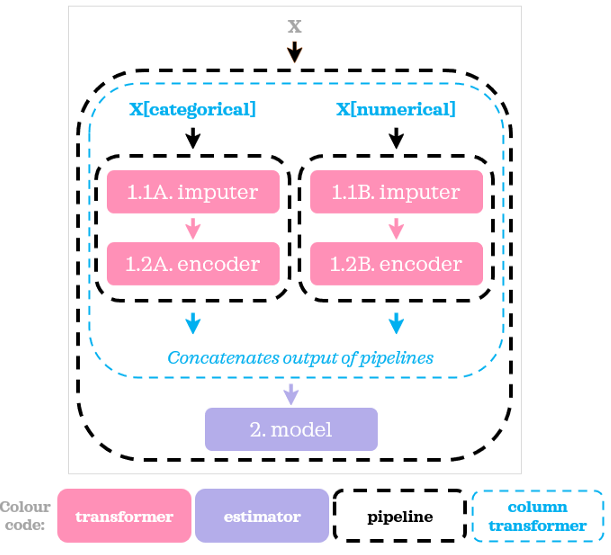



# Build OOP Features Engineer Classes 
Feature generation creates new features using knowledge about the problem and data. In the real-world example, you saw that fraud features could be derived from the transaction history. In this dataset, some features have already been derived: 

    Step: Timedelta. 
 

Here are some ways that feature columns can be analyzed, combined, and transformed to create new features: 

    Splitting or combining columns
    Encoding target, frequency, and aggregation

**Splitting or combining column:s**

If this correlates better with the target, combine columns or split one column into two.


Encoding target, frequency, and aggregation

To detect credit card fraud, you are looking for unusual credit card behavior. Target, frequency, and aggregation encodings add features that measure the rarity of features or combinations of features. 

With target encoding, features are replaced or added with the probability of the categorical value corresponding to the target. For example, if 3% of fraudulent transactions are of card type “debit,” then the value “debit” is replaced with .03.  

With frequency encoding, features are replaced or added with the count of the categorical value. For example, to add a column for how frequently NameDis or NameOrig  occurs in transactions, you can add a value count column for that feature, as in the following code example: 

        temp = df['NameOrig'].value_counts().to_dict()
        df['NameOrig_counts'] = df['NameOrig'].map(temp)
        

I used frequency encoding to create the following new features: 

    NameDis
    NameOrig
    

Aggregation encoding adds features based on feature aggregation statistics, such as mean or standard deviation for groups of features. This allows machine learning algorithms such as decision trees to determine if a value is common or rare for a particular group. 

You can calculate group statistics by providing pandas with three variables: group, variable of interest, and type of statistic. For example, the following code example adds to each row the average TransactionAmt value for that row’s NameOrig group, allowing the ML algorithm to determine if a row has an abnormal TransactionAmt value for the NameOrig value (the Name holder’s account).

        temp = df.groupby('card1')['TransactionAmt'].agg(['mean'])   
            .rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        df = pd.merge(df,temp,on='card1',how='left')
        
        

Classification identifies the class or category to which an item belongs, based on the training data of labels and features. Features are the interesting properties in the data that you can use to make predictions. To build a classifier model, you extract and test to find the features of interest that most contribute to the classification. For feature engineering for credit card fraud, the goal is to distinguish normal card usage from fraudulent unusual card usage, for example, features that measure the differences between recent and historical activities.

For online credit card transactions, there are features associated with the transaction or credit card holder and features that can be engineered from transaction histories. 

Features associated with the transaction: 

    Date and time
    Transaction amount
    Merchant
    Product

Features associated with the credit card holder:

    Card type
    Credit card number 
    Expiration date
    Billing address (street address, state, zip code), 
    Phone number 
    Email address


Possible features generated from transaction history:

Number of transactions a credit card holder has made in the last 24 hours (holder features plus device ID and IP address) its not availble in our data 
i have only step so i add new feature cum count for each client in  each step.
if we can get more data we can  exctract other useful features : 

    Same or different credit card numbers?
    Same or different shipping addresses? 
    The total amount a credit cardholder has spent in the last 24 hours
    Average amount last 24 hours compared to the historical daily average amount
    Number of transactions made from the same device or IP address in the last 24 hours
    Multiple online charges in close temporal proximity?
    Frequent fraud at a specific merchant?
    Group of fraud charges in certain areas?
    Multiple charges from a merchant within a short time span?
    
  
Classification identifies the class or category to which an item belongs, based on the training data of labels and features. Features are the interesting properties in the data that you can use to make predictions. To build a classifier model, you extract and test to find the features of interest that most contribute to the classification. For feature engineering for credit card fraud, the goal is to distinguish normal card usage from fraudulent unusual card usage, for example, features that measure the differences between recent and historical activities. 
Finally for this step we get the most import features by coding some transformer .  


In [12]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
    def __init__(self, positions):
        self.positions = positions

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #return np.array(X)[:, self.positions]
        return X.loc[:, self.positions] 
########################################################################
class CustomLogTransformer(BaseEstimator, TransformerMixin):
    # https://towardsdatascience.com/how-to-write-powerful-code-others-admire-with-custom-sklearn-transformers-34bc9087fdd
    def __init__(self):
        self._estimator = PowerTransformer()

    def fit(self, X, y=None):
        X_copy = np.copy(X) + 1
        self._estimator.fit(X_copy)

        return self

    def transform(self, X):
        X_copy = np.copy(X) + 1

        return self._estimator.transform(X_copy)

    def inverse_transform(self, X):
        X_reversed = self._estimator.inverse_transform(np.copy(X))

        return X_reversed - 1  

class TemporalVariableTransformer(BaseEstimator, TransformerMixin):
    # Temporal elapsed time transformer

    def __init__(self, variables, reference_variable):
        
        if not isinstance(variables, list):
            raise ValueError('variables should be a list')
        
        self.variables = variables
        self.reference_variable = reference_variable

    def fit(self, X, y=None):
        # we need this step to fit the sklearn pipeline
        return self

    def transform(self, X):

       # so that we do not over-write the original dataframe
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = X[self.reference_variable] - X[feature]

        return X
    
class CustomImputer(BaseEstimator, TransformerMixin) : 
     def __init__(self, variable, by) : 
            #self.something enables you to include the passed parameters
            #as object attributes and use it in other methods of the class
            self.variable = variable
            self.by = by

     def fit(self, X, y=None) : 
          self.map = X.groupby(self.by)[variable].mean()
          #self.map become an attribute that is, the map of values to
          #impute in function of index (corresponding table, like a dict)
          return self

     def transform(self, X, y=None) : 
          X[variable] = X[variable].fillna(value = X[by].map(self.map))
          #Change the variable column. If the value is missing, value should 
          #be replaced by the mapping of column "by" according to the map you
          #created in fit method (self.map)
          return X
    
# categorical missing value imputer
class Mapper(BaseEstimator, TransformerMixin):

    def __init__(self, variables, mappings):

        if not isinstance(variables, list):
            raise ValueError('variables should be a list')

        self.variables = variables
        self.mappings = mappings

    def fit(self, X, y=None):
        # we need the fit statement to accomodate the sklearn pipeline
        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.variables:
            X[feature] = X[feature].map(self.mappings)

        return X  
    
##########################################################################
class CountFrequencyEncoder(BaseEstimator, TransformerMixin):
    #temp = df['card1'].value_counts().to_dict()
    #df['card1_counts'] = df['card1'].map(temp)
    def __init__(
        self,
        encoding_method: str = "count",
        variables: Union[None, int, str, List[Union[str, int]]] = None,
        keep_variable=True,
                  ) -> None:

        self.encoding_method = encoding_method
        self.variables = variables
        self.keep_variable=keep_variable

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None):
        """
        Learn the counts or frequencies which will be used to replace the categories.
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
            The training dataset. Can be the entire dataframe, not just the
            variables to be transformed.
        y: pandas Series, default = None
            y is not needed in this encoder. You can pass y or None.
        """
        self.encoder_dict_ = {}

        # learn encoding maps
        for var in self.variables:
            if self.encoding_method == "count":
                self.encoder_dict_[var] = X[var].value_counts().to_dict()

            elif self.encoding_method == "frequency":
                n_obs = float(len(X))
                self.encoder_dict_[var] = (X[var].value_counts() / n_obs).to_dict()
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        # replace categories by the learned parameters
        X = X.copy()
        for feature in self.encoder_dict_.keys():
            if self.keep_variable:
                X[feature+'_fq_enc'] = X[feature].map(self.encoder_dict_[feature])
            else:
                X[feature] = X[feature].map(self.encoder_dict_[feature])
        return X[self.variables].to_numpy()
#################################################   
class FeaturesEngineerGroup(BaseEstimator, TransformerMixin):
    def __init__(self,groupping_method ="mean",
                   variables=  "amount",
                   groupby_variables = "nameOrig"                         
                 ) :
        self.groupping_method = groupping_method
        self.variables=variables
        self.groupby_variables=groupby_variables
        
    def fit(self, X, y=None):
        """
        Learn the mean or median of  amount of each client which will be used to create new feature for each unqiue client in order to undersatant thier behavior .
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
        The training dataset. Can be the entire dataframe, not just the
        variables to be transformed.
        y: pandas Series, default = None
        y is not needed in this encoder. You can pass y or None.
        """
        self.group_amount_dict_ = {}
        #df.groupby('card1')['TransactionAmt'].agg(['mean']).to_dict()
        #temp = df.groupby('card1')['TransactionAmt'].agg(['mean']).rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        #df = pd.merge(df,temp,on='card1',how='left')
        #target_mean = df_train.groupby(['id1', 'id2'])['target'].mean().rename('avg')
        #df_test = df_test.join(target_mean, on=['id1', 'id2'])
        #lifeExp_per_continent = gapminder.groupby('continent').lifeExp.mean()
        # learn mean/medain 
        #for groupby in self.groupby_variables:
         #   for var in self.variables:
        if self.groupping_method == "mean":
            self.group_amount_dict_[self.variables] =X.fillna(np.nan).groupby([self.groupby_variables])[self.variables].agg(['mean']).to_dict()
        elif self.groupping_method == "median":
            self.group_amount_dict_[self.variables] =X.fillna(np.nan).groupby([self.groupby_variables])[self.variables].agg(['median']).to_dict()
        else:
            print('error , chose mean or median')
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        #for col in self.variables:
         #   for agg_type in self.groupping_method:
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method
        X[new_col_name] = X[self.groupby_variables].map(self.group_amount_dict_[ self.variables][self.groupping_method])
        return X[new_col_name].to_numpy().reshape(-1,1)    
    
################################################   
class FeaturesEngineerGroup2(BaseEstimator, TransformerMixin):
    def __init__(self,groupping_method ="mean",
                   variables=  "amount",
                   groupby_variables = "nameOrig"                         
                 ) :
        self.groupping_method = groupping_method
        self.variables=variables
        self.groupby_variables=groupby_variables
        
    def fit(self, X, y=None):
        """
        Learn the mean or median of  amount of each client which will be used to create new feature for each unqiue client in order to undersatant thier behavior .
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
        The training dataset. Can be the entire dataframe, not just the
        variables to be transformed.
        y: pandas Series, default = None
        y is not needed in this encoder. You can pass y or None.
        """
        X = X.copy()
        self.group_amount_dict_ = {}
        #df.groupby('card1')['TransactionAmt'].agg(['mean']).to_dict()
        #temp = df.groupby('card1')['TransactionAmt'].agg(['mean']).rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        #df = pd.merge(df,temp,on='card1',how='left')
        #target_mean = df_train.groupby(['id1', 'id2'])['target'].mean().rename('avg')
        #df_test = df_test.join(target_mean, on=['id1', 'id2'])
        #lifeExp_per_continent = gapminder.groupby('continent').lifeExp.mean()
        # learn mean/medain 
        #for groupby in self.groupby_variables:
         #   for var in self.variables:

        print('we have {} unique clients'.format(X[self.groupby_variables].nunique()))
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method    
        X[new_col_name] = X.groupby([self.groupby_variables])[[self.variables]].transform(self.groupping_method)
        X = X.drop_duplicates(['nameOrig'])
    
        self.group_amount_dict_ = dict(zip(X[self.groupby_variables], X[new_col_name]))
        del X
        print('we have {} unique mean amount : one for each client'.format(len(self.group_amount_dict_)))
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        #for col in self.variables:
         #   for agg_type in self.groupping_method:
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method
        X[new_col_name] = X[self.groupby_variables].map(self.group_amount_dict_)
        return X[new_col_name].to_numpy().reshape(-1,1)   
    
############################################  
class FeaturesEngineerCumCount(BaseEstimator, TransformerMixin):
    def __init__(self,group_one ="step",
                   group_two=  "nameOrig"                       
                 ) :
        self.group_one =group_one
        self.group_two=group_two
        
    def fit(self, X, y=None):
        """
        """
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        new_col_name =  self.group_two+'_Transaction_count'
        X[new_col_name] = X.groupby([self.group_one, self.group_two])[[self.group_two]].transform('count')
        return X[new_col_name].to_numpy().reshape(-1,1)

# Features selection : 
**Feature Selection**
Feature selection is a method of selecting features from your feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve your model's performance. Perhaps your existing feature set is much too large, or some of the features you're working with are unnecessary. There are different ways you can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests

**Why reduce dimensionality?**

Your dataset will become simpler and thus easier to work with, require less disk space to store and computations will run faster. In addition, models are less likely to overfit on a dataset with fewer dimensions.

**Selection vs extraction**

When we apply feature selection, we completely remove a feature and the information it holds from the dataset. We try to minimize the information loss by only removing features that are irrelevant or hold little unique information, but this is not always possible.

Compared to feature selection, feature extraction is a completely different approach but with the same goal of reducing dimensionality. Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones. These new features have as little redundant information in them as possible and are therefore fewer in number. One downside is that the newly created features are often less intuitive to understand than the original ones. 
PCA Calculating.


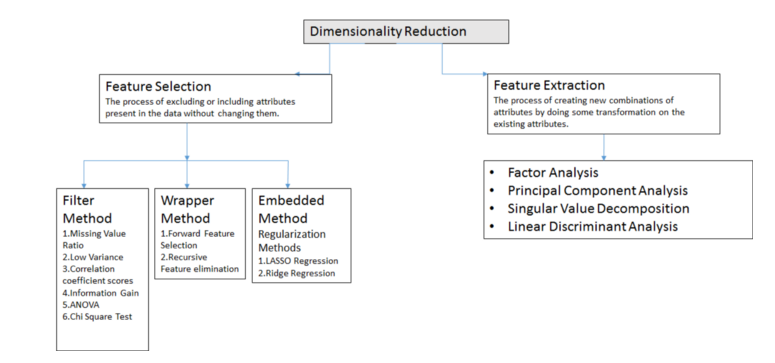

I will not do this step in this project , but you can try those methods in order to get better results .
 

 # Baseline Pipe :
 This the first round to get the best preprocess steps 

In [13]:
# Cat columns: 
cat_pipe = Pipeline([
                     ('Encoder',ce.target_encoder.TargetEncoder())
                     
                    ])
#Num_columns:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median',add_indicator=False)),
                     ('scaler', QuantileTransformer())
                    ])
#Feature Union fitting training data :
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])
# Using ColumnTransformer:
data_cleaning = ColumnTransformer([
    ('cat_columns',  cat_pipe, cat_columns ),
    ('num_columns', num_pipe , num_columns)
])
# preprocessor.fit(X_train)
#############################
# Complete Pipe 
def create_pipeline(model,preprocessor,FeaturesEngineer=None):
    pipeline = Pipeline([ 
        ('pre', preprocessor),
        ('lgbm', model)
    ])
    return pipeline

preprocessor 

FeatureUnion(transformer_list=[('cat',
                                Pipeline(steps=[('Encoder', TargetEncoder())])),
                               ('num',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('scaler',
                                                 QuantileTransformer())]))])

In [14]:
train0=data_cleaning.fit_transform(X_train,y_train)
print('Every thing is OK:')
print('train have size of {}'.format(train0.shape))
train0[0]

Every thing is OK:
train have size of (317559, 9)


array([0.        , 0.00121552, 0.00121552, 0.62512513, 0.0803242 ,
       0.9862046 , 0.98577106, 0.52244855, 0.48163079])

# Advanced Pipe :
This pipe include features engineer+ some advanced preprocessing steps for each columns.

In [15]:
# complete pipe :
# select the float/cat columns
#cat_feautres = X.select_dtypes(include=['object','category']).columns
#num_features = X.select_dtypes(exclude=['object','category']).columns
#Define vcat pipeline
features_cum_count=['step','nameOrig']
features_groupby_amount=['amount','nameOrig']
features_frequency_orig_dest=['nameOrig','nameDest']
features_cum_count_pipe = Pipeline([
                     ('transformer_Encoder', FeaturesEngineerCumCount())
                    ])

features_groupby_pipe = Pipeline([
                     ('transformer_group_amount_mean', FeaturesEngineerGroup2()),
                     ('transformer_group_scaler', PowerTransformer())
                    ])
features_frequency_pipe = Pipeline([
                     ('Encoder', CountFrequencyEncoder(variables=['nameOrig','nameDest'],encoding_method ="frequency", keep_variable=False))
                    ])
type_pipe= Pipeline([
                     ('transformer_Encoder', ce.cat_boost.CatBoostEncoder())
                    ])
num_features0=[  'amount',  'oldbalanceOrig', 'newbalanceOrig' ,'oldbalanceDest', 'newbalanceDest']
#Define vnum pipeline
num_pipe = Pipeline([
                     ('scaler', PowerTransformer()),
                    ])
#Featureunion fitting training data
preprocessor = FeatureUnion(transformer_list=[('cum_count', features_cum_count_pipe),
                                              ('mean_amount', features_groupby_pipe),
                                              ('frequency_dest_orig', features_frequency_pipe),
                                              ('trans_type', type_pipe),
                                              ('num', num_pipe)])
data_preparing= ColumnTransformer([
    ('cum_count', features_cum_count_pipe, features_cum_count ),
    ('mean_amount', features_groupby_pipe, features_groupby_amount ),
    ('frequency_dest_orig', features_frequency_pipe, features_frequency_orig_dest ),
    ('trans_type', type_pipe, ['type'] ),
    ('num', num_pipe, num_features0)
], remainder='drop')
data_preparing

ColumnTransformer(transformers=[('cum_count',
                                 Pipeline(steps=[('transformer_Encoder',
                                                  FeaturesEngineerCumCount())]),
                                 ['step', 'nameOrig']),
                                ('mean_amount',
                                 Pipeline(steps=[('transformer_group_amount_mean',
                                                  FeaturesEngineerGroup2()),
                                                 ('transformer_group_scaler',
                                                  PowerTransformer())]),
                                 ['amount', 'nameOrig']),
                                ('frequency_dest_orig',
                                 Pipeline(steps=[('Encoder',
                                                  CountFrequencyEncoder(encoding_method='frequency',
                                                                        keep_variable=False,
                                                                        variables=['nameOrig',
                                                                                   'nameDest']))]),
                                 ['nameOrig', 'nameDest']),
                                ('trans_type',
                                 Pipeline(steps=[('transformer_Encoder',
                                                  CatBoostEncoder())]),
                                 ['type']),
                                ('num',
                                 Pipeline(steps=[('scaler',
                                                  PowerTransformer())]),
                                 ['amount', 'oldbalanceOrig', 'newbalanceOrig',
                                  'oldbalanceDest', 'newbalanceDest'])])

In [16]:
train1=data_preparing.fit_transform(X_train,y_train)
print('Every thing is OK:')
print('train have size of {}'.format(train1.shape))
train1[0]

we have 317539 unique clients
we have 317539 unique mean amount : one for each client
Every thing is OK:
train have size of (317559, 10)


array([ 1.00000000e+00, -1.40688998e+00,  3.14902113e-06,  3.14902113e-06,
        1.21552215e-03, -1.40682088e+00,  1.78538442e+00,  1.47418623e+00,
        5.81195820e-01,  4.34426244e-01])

<a id=4></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Modeling</center></h3>


Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.


Tasks

1. Select modeling technique Select technique

2. Generate test design

3. Build model

4. Assess model

This Step is done here : 




<a id=5></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Evaluation</center></h3>

# Model accuracy scoring

The easiest way to analyze performance is with accuracy. 
It measures how many observations, both positive and negative, were correctly classified.


You shouldn’t use accuracy on imbalanced problems. Then, it is easy to get a high accuracy score by simply classifying all observations as the majority class. For example in our case, by classifying all transactions as non-fraudulent we can get an accuracy of over 0.9.

**When to use it:**

    When your problem is balanced using accuracy is usually a good start. An additional benefit is that it is really easy to explain it to non-technical stakeholders in your project,
    When every class is equally important to you.

# Confusion Matrix

**How to compute:**

It is a common way of presenting true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions. Those values are presented in the form of a matrix where the Y-axis shows the true classes while the X-axis shows the predicted classes.

It is calculated on class predictions, which means the outputs from your model need to be thresholded first.

**When to use it:**

    Pretty much always. I like to see the nominal values rather than normalized to get a feeling on how the model is doing on different, often imbalanced, classes.



# ROC Curve


It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.

Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left side are better.

Since we have an imbalanced data set, Receiver Operating Characteristic Curves are not that useful although it's an expected output of most binary classifiers.
Because you can generate a pretty good-looking curve by just simply guessing each one is the non-fraud case.

**When to use it:**

    You should use it when you ultimately care about ranking predictions and not necessarily about outputting well-calibrated probabilities (read this article by Jason Brownlee if you want to learn about probability calibration).
    You should not use it when your data is heavily imbalanced. It was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives.
    You should use it when you care equally about positive and negative classes.. If we care about true negatives as much as we care about true positives then it totally makes sense to use ROC AUC.
    
# ROC AUC score   
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

**When to use it:**

    You should use it when you ultimately care about ranking predictions and not necessarily about outputting well-calibrated probabilities (read this article by Jason Brownlee if you want to learn about probability calibration).
    You should not use it when your data is heavily imbalanced. It was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives.
    You should use it when you care equally about positive and negative classes. It naturally extends the imbalanced data discussion from the last section. If we care about true negatives as much as we care about true positives then it totally makes sense to use ROC AUC.

# Recall    
It measures how many observations out of all positive observations have we classified as positive. It tells us how many fraudulent transactions we recalled from all fraudulent transactions.
true positive rate

When you are optimizing recall you want to put all guilty in prison.
**When to use it:**

    Usually, you will not use it alone but rather coupled with other metrics like precision.
    That being said, recall is a go-to metric, when you really care about catching all fraudulent transactions even at a cost of false alerts. Potentially it is cheap for you to process those alerts and very expensive when the transaction goes unseen.
    
# Precision

It measures how many observations predicted as positive are in fact positive. Taking our fraud detection example, it tells us what is the ratio of transactions correctly classified as fraudulent.
positive predictive value

When you are optimizing precision you want to make sure that people that you put in prison are guilty. 

**When to use it:**

    Again, it usually doesn’t make sense to use it alone but rather coupled with other metrics like recall.
    When raising false alerts is costly, when you want all the positive predictions to be worth looking at you should optimize for precision.
    


**Precision vs. Recall for Imbalanced Classification:**

You may decide to use precision or recall on your imbalanced classification problem.

Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

    Precision: Appropriate when minimizing false positives is the focus.
    Recall: Appropriate when minimizing false negatives is the focus.

Sometimes, we want excellent predictions of the positive class. We want high precision and high recall.

This can be challenging, as often increases in recall often come at the expense of decreases in precision.

    In imbalanced datasets, the goal is to improve recall without hurting precision. These goals, however, are often conflicting, since in order to increase the TP for the minority class, the number of FP is also often increased, resulting in reduced precision.
    
    
# PR AUC score | Average precision

Similarly to ROC AUC score you can calculate the Area Under the Precision-Recall Curve to get one number that describes model performance.

You can also think about PR AUC as the average of precision scores calculated for each recall threshold [0.0, 1.0]. You can also adjust this definition to suit your business needs by choosing/clipping recall thresholds if needed.

**When to use it:**

    when you want to communicate precision/recall decision to other stakeholders
    when you want to choose the threshold that fits the business problem.
    when your data is heavily imbalanced. As mentioned before, it was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: since PR AUC focuses mainly on the positive class (PPV and TPR) it cares less about the frequent negative class.
    when you care more about positive than negative class. If you care more about the positive class and hence PPV and TPR you should go with Precision-Recall curve and PR AUC (average precision).
    
# F beta score

Simply put, it combines precision and recall into one metric. The higher the score the better our model is. You can calculate it in the following way:





When choosing beta in your F-beta score the more you care about recall over precision the higher beta you should choose. For example, with F1 score we care equally about recall and precision with F2 score, recall is twice as important to us.
F beta by beta

With 0<beta<1 we care more about precision and so the higher the threshold the higher the F beta score. When beta>1 our optimal threshold moves toward lower thresholds and with beta=1 it is somewhere in the middle.  

**When to use it:**

    Pretty much in every binary classification problem. It is my go-to metric when working on those problems. It can be easily explained to business stakeholders.
    
 for more details see this article:[https://neptune.ai/blog/evaluation-metrics-binary-classification](http://)    
 
==>Complete evaluation will be done when we train the model on all data that we have and with the best tuned model.

<a id=6></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Deploy</center></h3>

The deployment of machine learning models is the process for making models available in production environments, where they can provide predictions to other software systems.

●One of the last stages in the Machine Learning Lifecycle.

●Potentially the most challenging stage.

●Challenges of traditional software

oReliability
oReusability
oMaintainability
oFlexibility

●Additional challenges specific to Machine Learning

oReproducibility

Needs coordination of data scientists, IT teams, software developers and business professionals:

oEnsure model works reliably
oEnsure model delivers the intended result.

●Potential discrepancy between programming language in which the model is developed and the production system language.

oRe-coding the model extends the project timeline and risks lack of reproducibility

Why is Model Deployment important?

●To start using a Machine Learning Model, it needs to be effectively deployed into production, so that they can provide predictions to other software systems.

●To maximize the value of the Machine Learning Model, we need to be able to reliably extract the predictions and share them with other systems.


**Research Environment**

●The Research Environment is a setting with tools, programs and software suitable for data analysis and the development of machine learning models.

●Here, we develop the Machine Learning Models and identify their value.
Its done by a data scientist : i prefer work on jupyter for this phase .

**Production Environment**

●The Production Environment is a real-time setting with running programs and hardware setups that allow the organization’s daily operations.

●It’s the place where the machine learning models is actually available for business use.

●It allows organisations to show clients a “live” service.
This job is done by solid sofware+ml engineer+ devops team



we have 4 ways to deploy models .
ML System Architectures:
1. Model embedded in application

2. Served via a dedicated service

3. Model published as data(streaming)

4. Batch prediction (offline process)


I developed  a baseline how to deploy model using Fastapi+docker on herokou :

https://github.com/DeepSparkChaker/FraudDetection_Fastapi


Complete deployment of our model is done here : 
<a id=7></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Summary</center></h3> 

We had developed end-to-end machine learning using the CRISP_DM methodology. Work still in progress. Always keep in mind that the data science / ML project must be done as a team and iteratively in order to properly exploit our data and add value to our business. Also keep in mind that AI helps you make the decision by using the added value extracted from the data but not the accountability. So we have to keep in mind to always use a composite AI in order to make the final decision.
Don't forgot to upvote if you find it useful .

https://www.kaggle.com/bannourchaker/frauddetection-part3-modeling2-selectbestmodel?scriptVersionId=81276811

for complete deployement baseline see : 

https://github.com/DeepSparkChaker/FraudDetection_Fastapi

References :

https://developer.nvidia.com/blog/leveraging-machine-learning-to-detect-fraud-tips-to-developing-a-winning-kaggle-solution/

python guidline : 

https://gist.github.com/sloria/7001839

features  selections :

https://www.kaggle.com/sz8416/6-ways-for-feature-selection

https://pub.towardsai.net/feature-selection-and-removing-in-machine-learning-dd3726f5865c

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910

Cripspdm :
https://www.kaggle.com/bannourchaker/4-featureengineer-featuresselectionpart4?scriptVersionId=73374083

Quanrile transformer : 

https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

Best link for all : 

https://neptune.ai/blog/tabular-data-binary-classification-tips-and-tricks-from-5-kaggle-competitions

complete guide Stacking :

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://neptune.ai/blog/ensemble-learning-guide

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial


Missing : 

https://www.kaggle.com/dansbecker/handling-missing-values

Binning : 

https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization-7deb6a5c6e27

https://www.analyticsvidhya.com/blog/2020/10/getting-started-with-feature-engineering/

Cat :

https://innovation.alteryx.com/encode-smarter/

https://github.com/alteryx/categorical_encoding/blob/main/guides/notebooks/categorical-encoding-guide.ipynb

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://maxhalford.github.io/blog/target-encoding/


Choice of kmeans : 

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Imputation : 

https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

Choice of  roc vs precssion_recall : 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


How to tune for he futur work : 

https://www.kaggle.com/hamidrezabakhtaki/xgboost-catboost-lighgbm-optuna-final-submission

https://www.kaggle.com/bextuychiev/lgbm-optuna-hyperparameter-tuning-w-understanding



Deploy:

https://towardsdatascience.com/from-jupyter-notebook-to-deployment-a-straightforward-example-1838c203a437

 https://github.com/DeepSparkChaker/Titanic_Deep_Spark/blob/main/app.py
https://github.com/Kunal-Varma/Deployment-of-ML-model-using-FASTAPI/tree/2cc0319abbec469010a5139f460004f2a75a7482
https://realpython.com/fastapi-python-web-apis/
 https://github.com/tiangolo/fastapi/issues/3373
 https://www.freecodecamp.org/news/data-science-and-machine-learning-project-house-prices/
https://github.com/tiangolo/fastapi/issues/1616
https://stackoverflow.com/questions/68244582/display-dataframe-as-fastapi-output
https://www.kaggle.com/sakshigoyal7/credit-card-customers
https://github.com/renanmouraf/data-science-house-prices    
https://towardsdatascience.com/data-science-quick-tips-012-creating-a-machine-learning-inference-api-with-fastapi-bb6bcd0e6b01
https://towardsdatascience.com/how-to-build-and-deploy-a-machine-learning-model-with-fastapi-64c505213857
https://analyticsindiamag.com/complete-hands-on-guide-to-fastapi-with-machine-learning-deployment/

https://github.com/shaz13/katana/blob/develop/Dockerfile


https://github.com/TripathiAshutosh/FastAPI/blob/main/main.py

Best practices : 
    
https://theaisummer.com/best-practices-deep-learning-code/    
https://github.com/The-AI-Summer/Deep-Learning-In-Production/tree/master/2.%20Writing%20Deep%20Learning%20code:%20Best%20Practises

 Docker :
 
 https://towardsdatascience.com/docker-in-pieces-353525ec39b0?fbclid=IwAR102sks2L0vRTde2qz1g4I4NhqXxnoqfV4IFzmZke4DvGcuiuYhj25eVSY
 
https://github.com/dkhundley/ds-quick-tips/blob/master/012_dockerizing_fastapi/Dockerfile


 Deploy + scaling :
https://towardsdatascience.com/deploying-ml-models-in-production-with-fastapi-and-celery-7063e539a5db
https://github.com/jonathanreadshaw/ServingMLFastCelery

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/07-feature-engineering-pipeline.ipynb

Ml OPS : 
https://www.linkedin.com/posts/vipulppatel_getting-started-with-mlops-21-page-tutorial-activity-6863895411837415424-dWMh/?fbclid=IwAR3Y4clbzujS_s2FFWg3tTYMKaGhh3vo25NUyoVdKHAJ7zynmCTNtzlHQ4M

https://towardsai.net/p/machine-learning/mlops-demystified?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR3MimsSXCFq3GqiLKoaQqXbeb3bkSwKhSkfQSKT_c1gsHDMGSBAv63s7Po
https://www.youtube.com/watch?v=9I8X-3HIErc

https://pub.towardsai.net/deployment-ml-ops-guide-series-2-69d4a13b0dcf

Publish to medium : 

https://towardsai.net/p/data-science/how-to-publish-a-jupyter-notebook-as-a-medium-blogpost?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR2-an7kknO3bsI5xjRdjL3jiwuPy7MBN5lVBc6fzx15mGY2iLS5KndCYWc


